In [23]:
# IMPORTACION DE BIBLIOTECAS NECESARAS:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#📌 Extracción

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#cargar el archivo de datos
db_f = pd.read_json('/content/drive/MyDrive/TelecomX_Data.json')
db = pd.DataFrame(db_f)
db

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [7]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [8]:
db.dtypes

,0
customerID,object
Churn,object
customer,object
phone,object
internet,object
account,object


#🔧 Transformación

**Vamos a normalizar todos los datos anidados encontrados**

In [9]:
# --- 1. Aplanar la estructura JSON anidada ---
# Los datos de cliente, cuenta y servicios están en columnas anidadas.
# Los aplanaremos para facilitar el acceso.

db_customer = pd.json_normalize(db['customer']).drop(columns=['customerID'], errors='ignore')
db_account = pd.json_normalize(db['account']).drop(columns=['customerID', 'Churn'], errors='ignore')
db_phone_services = pd.json_normalize(db['phone']).drop(columns=['customerID', 'Churn'], errors='ignore')
db_internet_services = pd.json_normalize(db['internet']).drop(columns=['customerID', 'Churn'], errors='ignore')

# Unir los dataframes aplanados en uno solo
db_clean = pd.concat(
    [db[['customerID', 'Churn']], db_customer, db_account, db_phone_services, db_internet_services],
    axis=1
)

print("DataFrame aplanado y combinado:")
db_clean


DataFrame aplanado y combinado:


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,...,Charges.Total,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0002-ORFBO,No,Female,0,Yes,Yes,9,One year,Yes,Mailed check,...,593.3,Yes,No,DSL,No,Yes,No,Yes,Yes,No
1,0003-MKNFE,No,Male,0,No,No,9,Month-to-month,No,Mailed check,...,542.4,Yes,Yes,DSL,No,No,No,No,No,Yes
2,0004-TLHLJ,Yes,Male,0,No,No,4,Month-to-month,Yes,Electronic check,...,280.85,Yes,No,Fiber optic,No,No,Yes,No,No,No
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Month-to-month,Yes,Electronic check,...,1237.85,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Month-to-month,Yes,Mailed check,...,267.4,Yes,No,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,One year,No,Mailed check,...,742.9,Yes,No,DSL,Yes,No,No,Yes,No,No
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Month-to-month,Yes,Electronic check,...,1873.7,Yes,Yes,Fiber optic,No,No,No,No,No,Yes
7264,9992-UJOEL,No,Male,0,No,No,2,Month-to-month,Yes,Mailed check,...,92.75,Yes,No,DSL,No,Yes,No,No,No,No
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Two year,No,Mailed check,...,4627.65,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes


In [10]:
# --- 2. Manejo de valores faltantes en 'Churn' ---
# Reemplazar valores vacíos ('') en 'Churn' con NaN para poder eliminarlos fácilmente
db_clean['Churn'] = db_clean['Churn'].replace('', np.nan)
db_clean.dropna(subset=['Churn'], inplace=True)
print(f"\nRegistros después de eliminar 'Churn' vacíos: {len(db_clean)}")


Registros después de eliminar 'Churn' vacíos: 7043


In [11]:
# --- 3. Conversión de 'Charges.Total' a numérico ---
# La columna 'Charges.Total' es de tipo objeto y tiene espacios en blanco
db_clean['Charges.Total'] = pd.to_numeric(db_clean['Charges.Total'], errors='coerce')
# Rellenar los valores nulos (que eran espacios) con 0.
# Esto asume que los clientes nuevos no tienen cargos totales.
db_clean['Charges.Total'].fillna(0, inplace=True)
print("\nValores nulos en 'Charges.Total' después de la limpieza:", db_clean['Charges.Total'].isnull().sum())
print(db_clean['Charges.Total'].dtype)
db_clean['Charges.Total']


Valores nulos en 'Charges.Total' después de la limpieza: 0
float64


/tmp/ipython-input-1271438888.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  db_clean['Charges.Total'].fillna(0, inplace=True)


,Charges.Total
0,593.30
1,542.40
2,280.85
3,1237.85
4,267.40
...,...
7262,742.90
7263,1873.70
7264,92.75
7265,4627.65


In [12]:
# --- 4. Transformar 'SeniorCitizen' a categórico ---
db_clean['SeniorCitizen'] = db_clean['SeniorCitizen'].map({0: 'No', 1: 'Sí'})
print("\nValores únicos en 'SeniorCitizen' después de la transformación:")
print(db_clean['SeniorCitizen'].unique())

print("\nLimpieza y transformación completadas.")
db_clean["SeniorCitizen"]


Valores únicos en 'SeniorCitizen' después de la transformación:
['No' 'Sí']

Limpieza y transformación completadas.


,SeniorCitizen
0,No
1,No
2,No
3,Sí
4,Sí
...,...
7262,No
7263,No
7264,No
7265,No


In [13]:
db_clean

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,Contract,PaperlessBilling,PaymentMethod,...,Charges.Total,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,0002-ORFBO,No,Female,No,Yes,Yes,9,One year,Yes,Mailed check,...,593.30,Yes,No,DSL,No,Yes,No,Yes,Yes,No
1,0003-MKNFE,No,Male,No,No,No,9,Month-to-month,No,Mailed check,...,542.40,Yes,Yes,DSL,No,No,No,No,No,Yes
2,0004-TLHLJ,Yes,Male,No,No,No,4,Month-to-month,Yes,Electronic check,...,280.85,Yes,No,Fiber optic,No,No,Yes,No,No,No
3,0011-IGKFF,Yes,Male,Sí,Yes,No,13,Month-to-month,Yes,Electronic check,...,1237.85,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,0013-EXCHZ,Yes,Female,Sí,Yes,No,3,Month-to-month,Yes,Mailed check,...,267.40,Yes,No,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,No,No,No,13,One year,No,Mailed check,...,742.90,Yes,No,DSL,Yes,No,No,Yes,No,No
7263,9992-RRAMN,Yes,Male,No,Yes,No,22,Month-to-month,Yes,Electronic check,...,1873.70,Yes,Yes,Fiber optic,No,No,No,No,No,Yes
7264,9992-UJOEL,No,Male,No,No,No,2,Month-to-month,Yes,Mailed check,...,92.75,Yes,No,DSL,No,Yes,No,No,No,No
7265,9993-LHIEB,No,Male,No,Yes,Yes,67,Two year,No,Mailed check,...,4627.65,Yes,No,DSL,Yes,No,Yes,Yes,No,Yes


In [14]:
print(db_clean.dtypes)

customerID           object
Churn                object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total       float64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
dtype: object


In [38]:
db_clean.to_csv("db_clean.csv", index=False)

In [39]:
from google.colab import files
files.download("db_clean.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#📊 Carga y análisis

---
Vamos a visualizar primero la cantidad de clientes que siguen usando el
servicio y quienes no, en porcentaje

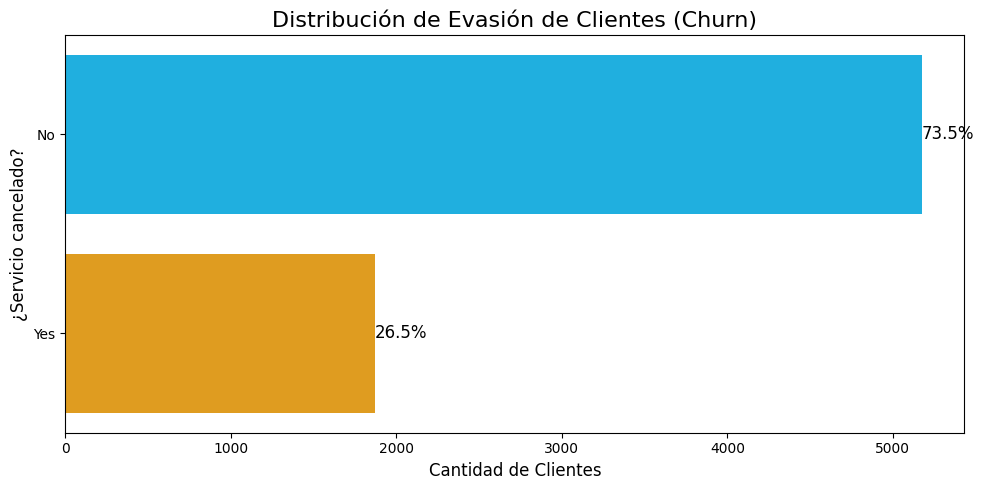

In [15]:
# Definir colores personalizados
colores = ['#00BFFF', '#FFA500']  # celeste y naranja
plt.figure(figsize=(10, 5))
sns.countplot(y='Churn', data=db_clean, hue='Churn', palette=colores, legend=False)

plt.title('Distribución de Evasión de Clientes (Churn)', fontsize=16)
plt.xlabel('Cantidad de Clientes', fontsize=12)
plt.ylabel('¿Servicio cancelado?', fontsize=12)

plt.grid(False)

# Añadir porcentajes en las barras horizontales
total = len(db_clean)
for p in plt.gca().patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_width()
    y = p.get_y() + p.get_height() / 2
    plt.gca().annotate(percentage, (x, y), ha='left', va='center', fontsize=12)

plt.tight_layout()
plt.show()

---
Aquí vamos a visualizar el porcentaje de cancelación por género

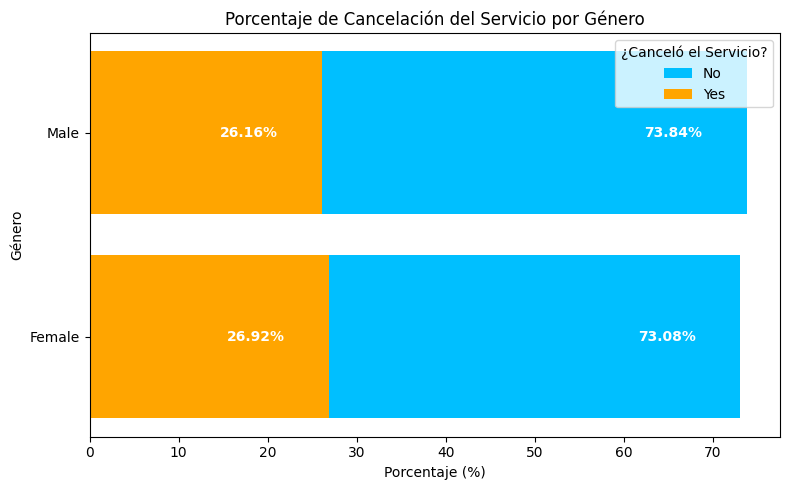

In [16]:
# Calcular porcentaje de cancelación por género:
gender_churn = db_clean.groupby(['gender', 'Churn']).size().reset_index(name='count')
gender_total = gender_churn.groupby('gender')['count'].transform('sum')
gender_churn['percentage'] = (gender_churn['count'] / gender_total * 100).round(2)

# Crear gráfico de barras horizontal
colores = {'No': '#00BFFF', 'Yes': '#FFA500'}  # Colores personalizados
fig, ax = plt.subplots(figsize=(8, 5))

for churn_status in ['No', 'Yes']:
    subset = gender_churn[gender_churn['Churn'] == churn_status]
    ax.barh(subset['gender'], subset['percentage'], label=churn_status, color=colores[churn_status])

    # Agregar el texto del porcentaje dentro de cada barra
    for i in range(len(subset)):
        ax.text(
            subset['percentage'].iloc[i] - 5,  # posición X (ajustada para que esté dentro)
            i,                                # posición Y
            f"{subset['percentage'].iloc[i]}%",
            va='center', ha='right', color='white', fontweight='bold'
        )

# Personalización del gráfico
ax.set_title('Porcentaje de Cancelación del Servicio por Género')
ax.set_xlabel('Porcentaje (%)')
ax.set_ylabel('Género')
ax.legend(title='¿Canceló el Servicio?')
ax.grid(False)

plt.tight_layout()
plt.show()


---
Aquí varios gráficos similares sobre el Servicio telefónico, el Servicio de Internet, multiples líneas, la Seguridad online y el respaldo Online

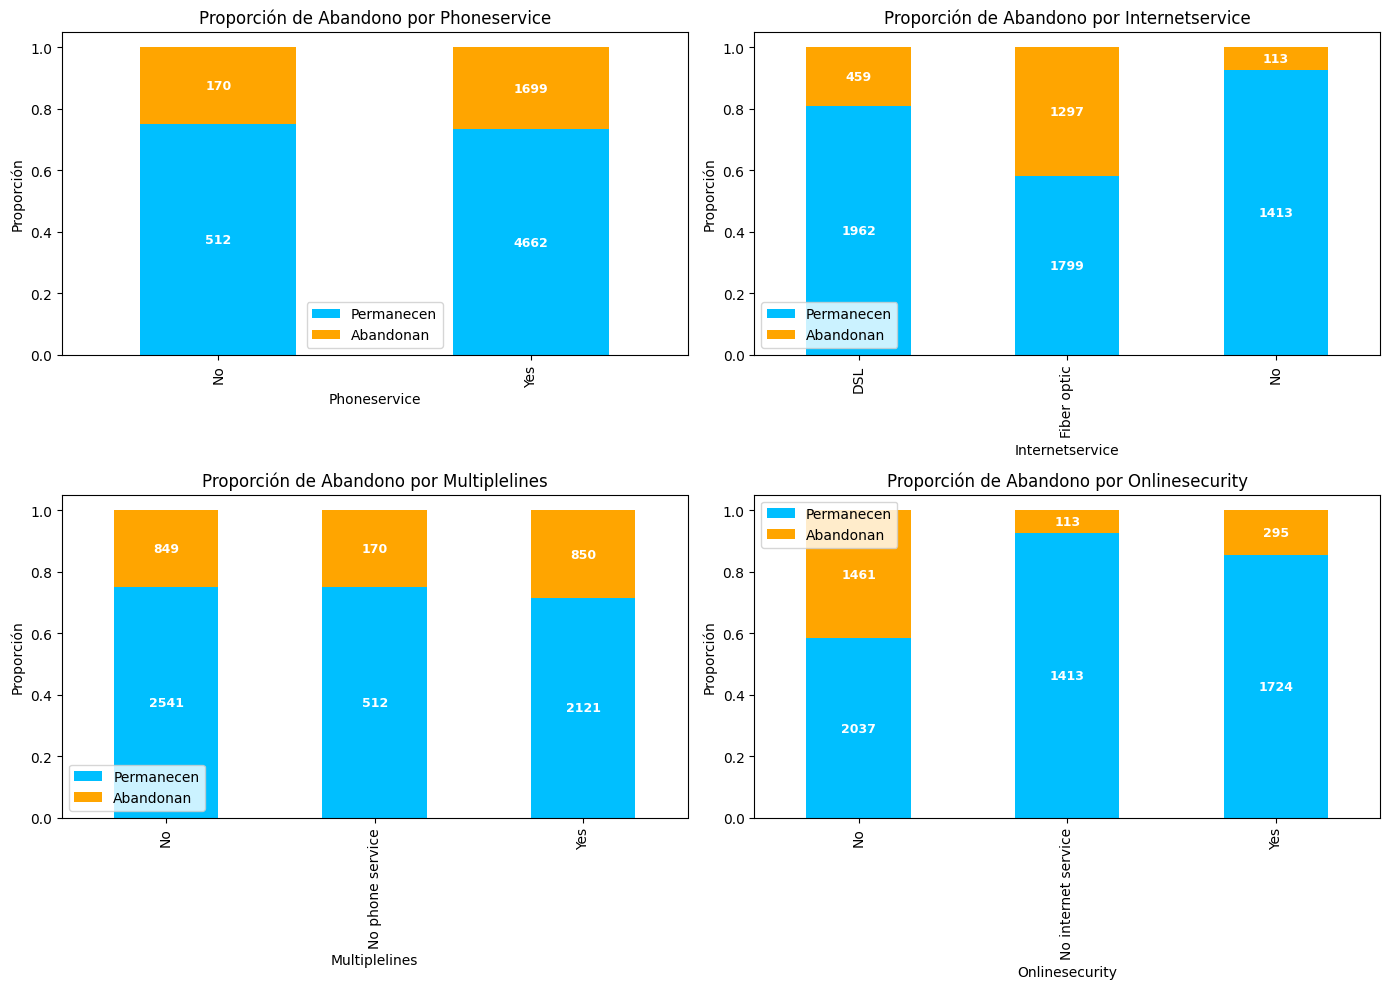

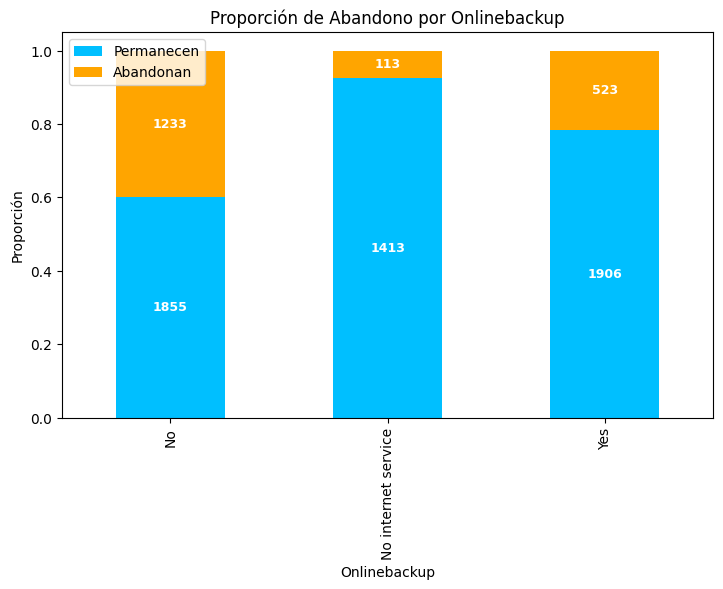

In [36]:
colores = ['#00BFFF', '#FFA500']  # Permanecen, Abandonan

variables_categoricas =[
    'PhoneService','InternetService','MultipleLines','OnlineSecurity','OnlineBackup']

for i in range(0, len(variables_categoricas), 4):
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    axs = axs.flatten()

    for j in range(4):
        if i + j < len(variables_categoricas):
            col = variables_categoricas[i + j]
            ax = axs[j]

            # Obtenemos las cantidades absolutas y proporciones
            conteos = db_clean.groupby(col)['Churn'].value_counts().unstack().fillna(0)
            proporciones = conteos.div(conteos.sum(axis=1), axis=0)

            # Graficar proporciones
            proporciones.plot(kind='bar', stacked=True, color=colores, ax=ax)

            # Agregar etiquetas de cantidad en cada barra
            for idx, cat in enumerate(conteos.index):
                total = conteos.loc[cat]
                bottom = 0
                for k, val in enumerate(total):
                    height = proporciones.loc[cat][k]
                    ax.text(
                        idx, bottom + height / 2,
                        f'{int(val)}',
                        ha='center', va='center', color='white', fontsize=9, fontweight='bold'
                    )
                    bottom += height

            ax.set_title(f'Proporción de Abandono por {col.replace("_", " ").title()}')
            ax.set_ylabel('Proporción')
            ax.set_xlabel(col.replace("_", " ").title())
            ax.legend(['Permanecen', 'Abandonan'])
        else:
            fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

---
Aquí un gráfico sobre el tipo de contrato de los clientes

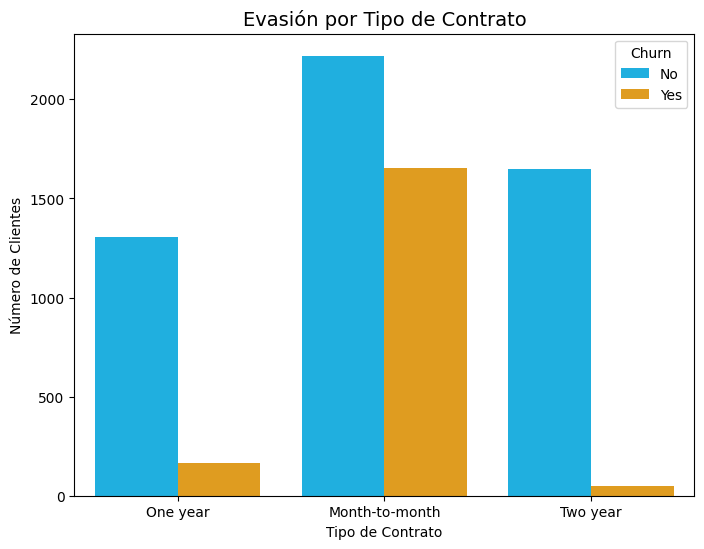

In [33]:
# Gráfico: Evasión por Tipo de Contrato
colores = ['#00BFFF', '#FFA500']  # Permanecen, Abandonan
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', hue='Churn', data=db_clean, palette=colores)
plt.title('Evasión por Tipo de Contrato', fontsize=14)
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.show()

---
En esta parte, un gráfico horizontal sobre el método de pago

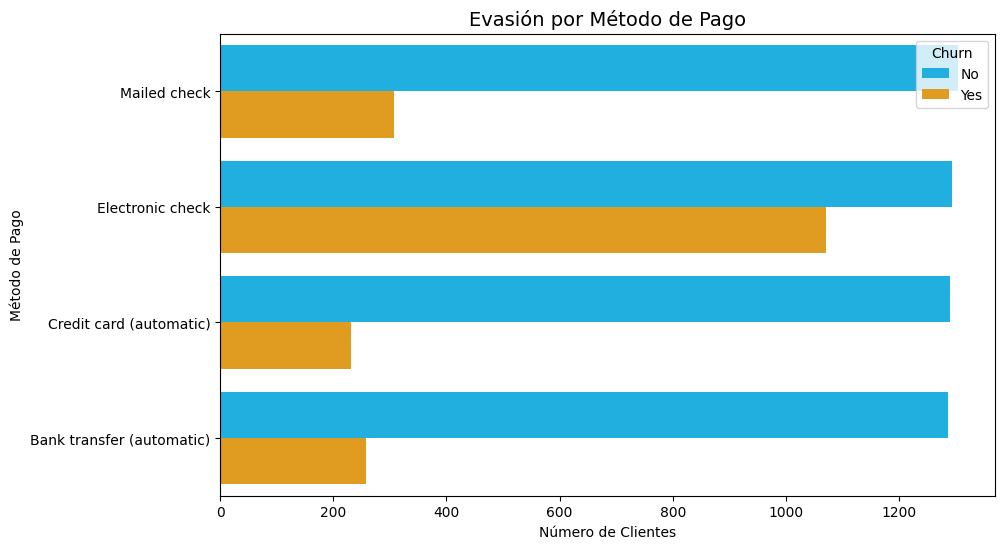

In [32]:
# Colores para Permanecen y Abandonan
colores = ['#00BFFF', '#FFA500']

# Gráfico: Evasión por Método de Pago
plt.figure(figsize=(10, 6))
sns.countplot(y='PaymentMethod', hue='Churn', data=db_clean, palette=colores)
plt.title('Evasión por Método de Pago', fontsize=14)
plt.xlabel('Número de Clientes')
plt.ylabel('Método de Pago')
plt.show()


---
Finalmente los gráficos de las columnas restantes

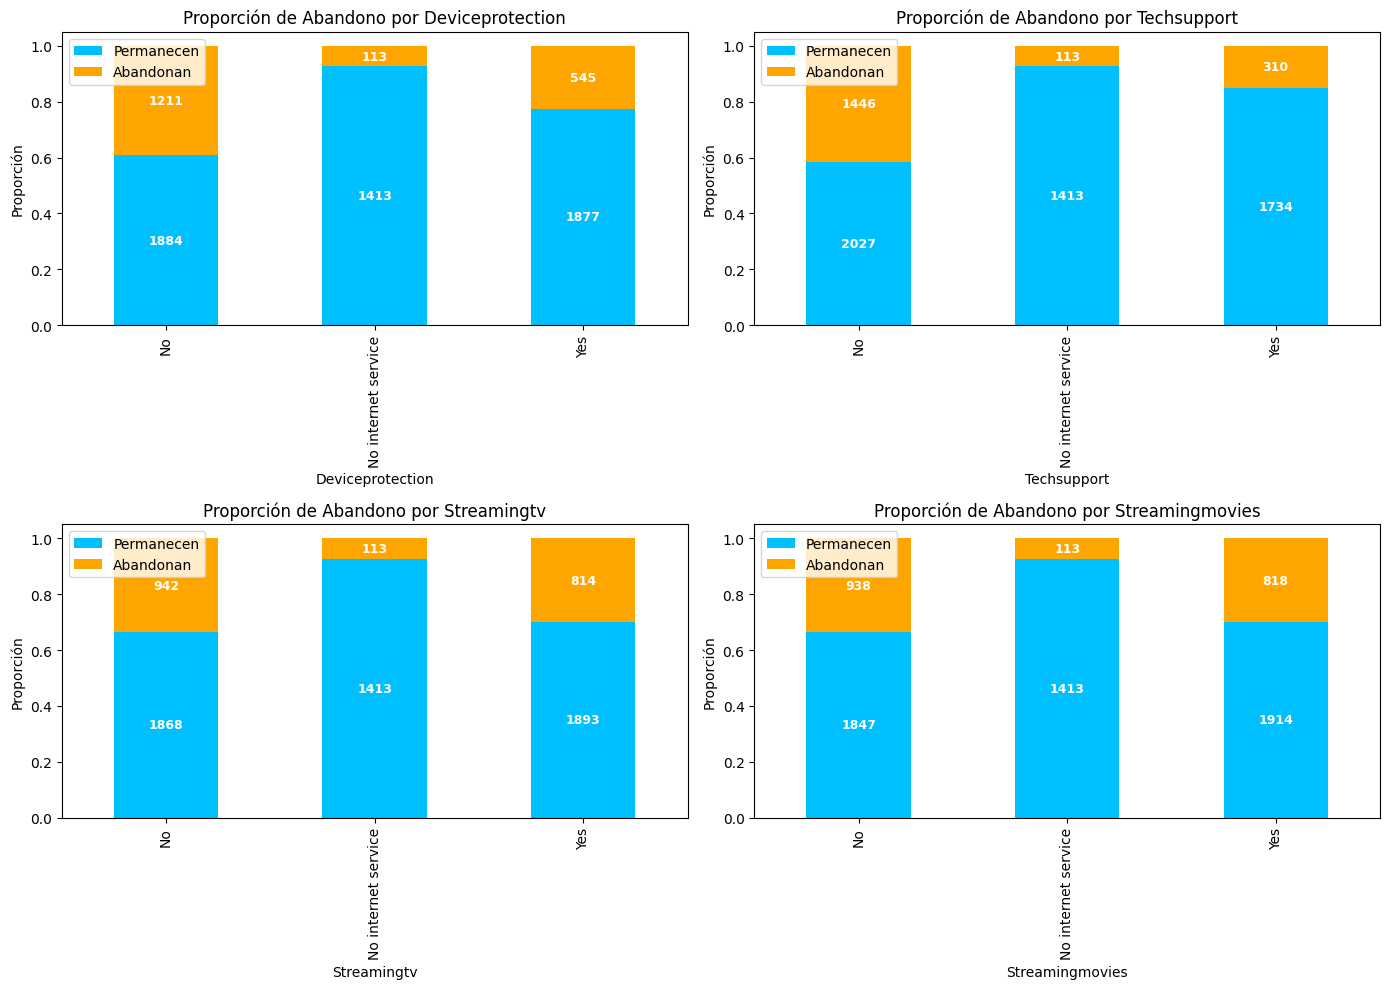

In [35]:
colores = ['#00BFFF', '#FFA500']  # Permanecen, Abandonan

variables_categoricas =[
    'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies']

for i in range(0, len(variables_categoricas), 4):
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    axs = axs.flatten()

    for j in range(4):
        if i + j < len(variables_categoricas):
            col = variables_categoricas[i + j]
            ax = axs[j]

            # Obtenemos las cantidades absolutas y proporciones
            conteos = db_clean.groupby(col)['Churn'].value_counts().unstack().fillna(0)
            proporciones = conteos.div(conteos.sum(axis=1), axis=0)

            # Graficar proporciones
            proporciones.plot(kind='bar', stacked=True, color=colores, ax=ax)

            # Agregar etiquetas de cantidad en cada barra
            for idx, cat in enumerate(conteos.index):
                total = conteos.loc[cat]
                bottom = 0
                for k, val in enumerate(total):
                    height = proporciones.loc[cat][k]
                    ax.text(
                        idx, bottom + height / 2,
                        f'{int(val)}',
                        ha='center', va='center', color='white', fontsize=9, fontweight='bold'
                    )
                    bottom += height

            ax.set_title(f'Proporción de Abandono por {col.replace("_", " ").title()}')
            ax.set_ylabel('Proporción')
            ax.set_xlabel(col.replace("_", " ").title())
            ax.legend(['Permanecen', 'Abandonan'])
        else:
            fig.delaxes(axs[j])

    plt.tight_layout()
    plt.show()

---
En estos últimos gráficos vamos a ver la relación entre los montos facturados y la evasión.

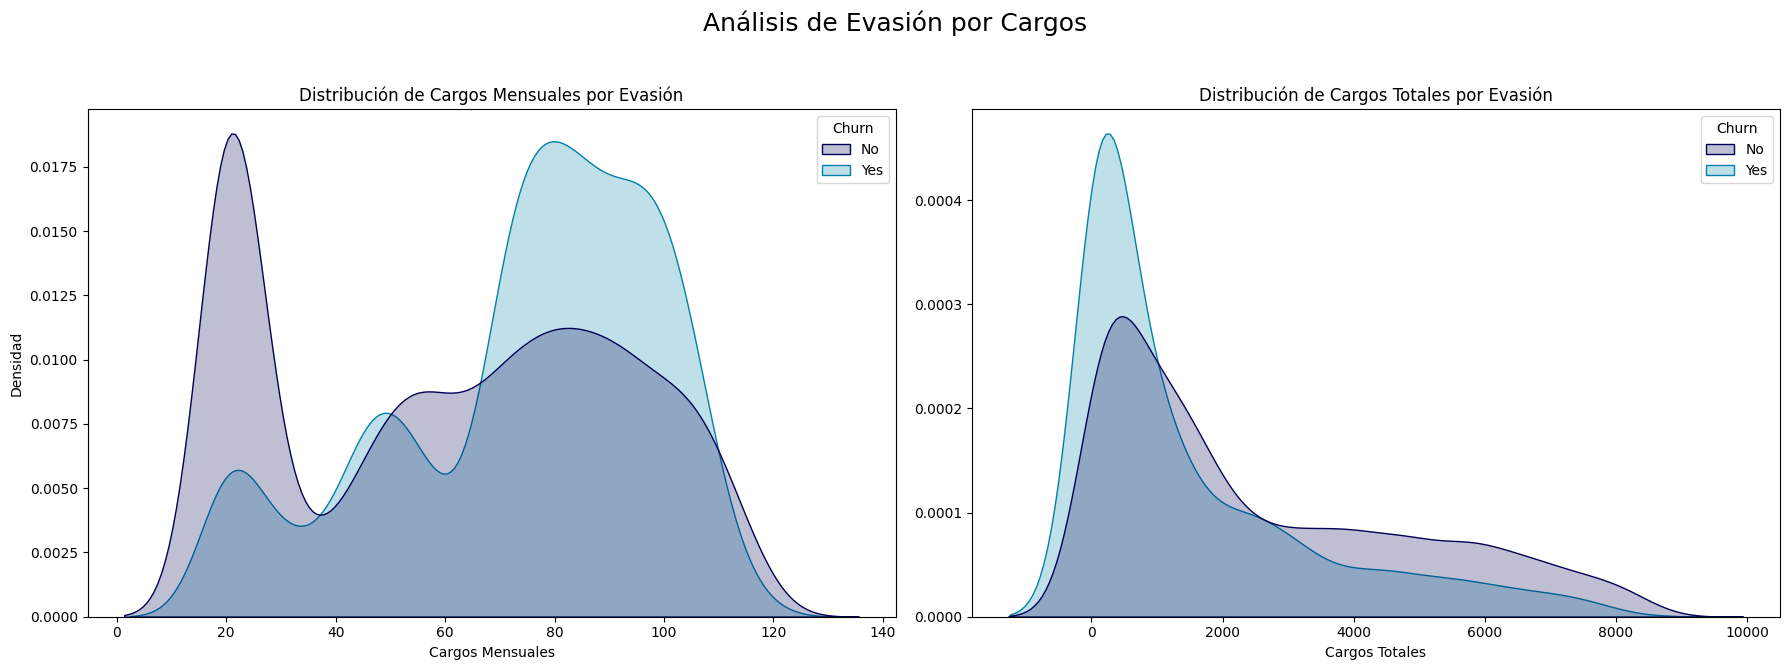

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))
fig.suptitle('Análisis de Evasión por Cargos', fontsize=18)

# Cargos Mensuales (MonthlyCharges)
sns.kdeplot(ax=axes[0], x='Charges.Monthly', hue='Churn', data=db_clean, fill=True, common_norm=False, palette='ocean')
axes[0].set_title('Distribución de Cargos Mensuales por Evasión')
axes[0].set_xlabel('Cargos Mensuales')
axes[0].set_ylabel('Densidad')

# Cargos Totales (TotalCharges)
sns.kdeplot(ax=axes[1], x='Charges.Total', hue='Churn', data=db_clean, fill=True, common_norm=False, palette='ocean')
axes[1].set_title('Distribución de Cargos Totales por Evasión')
axes[1].set_xlabel('Cargos Totales')
axes[1].set_ylabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

---
Con todos estos gráficos realizados, podemos darnos cuenta de varias características y servicios a los cuales el cliente está cancelando estos mismos

#📄Informe final

---
### Para poder realizar el proyecto asignado, hemos tenido que hacer uso de estas bibliotecas para poder realizar los gráficos y la manipulacion del archivo json a un Dataframe: pandas, numpy, matplotlib y seaborn.
---
### A continuación, un repaso de los gráficos realizados:
1. Distribución de Evasión de Clientes (Churn)
2. Cancelación del servicio por género
3. Cancelación de PhoneService
4. Cancelación de InternetService
5. Cancelación de MultipleLines
6. Cancelación de OnlineSecurity
7. Cancelación de OnlineBackup
8. Evasión por Tipo de Contrato
9. Evasión por Método de Pago
10. Cancelación de DeviceProtection
11. Cancelación de TechSupport
12. Cancelación de StreamingTV
13. Cancelación de StreamingMovies
14. Cargos Mensuales por Evasión
15. Cargos Totales por Evasión
---
Según estos gráficos, podemos interpretar que:
1. El 26.5% de los clientes de la empresa han cancelado sus servicios de esta.
2. Los clientes de sexo femenino son las que más cancelan los servicios de la empresa.
3. Se ha detectado que varios de los servicios que proporcionan la empresa han sido abandonados por los clientes. Esto puede deberse por muchas razones (costos altos, mal servicio, mejores opciones en el mercado, etc).
4. Se ha detectado que, los clientes con un tipo de contrato mensual son los que más han cancelado los servicios de la empresa.
---
RECOMENDACIONES PARA EL EQUIPO DE CIENCIAS DE DATOS Y EMPRESA:
1. Utilizar, analizar y contrarrestar los datos obtenidos de las decisiones de los clientes de abandonar x servicio/os.
2. Revisar los precios y planes de los servicios que la empresa brinda, en busquedad de un precio justo y razonable para sus clientes (atrayendo posiblemente a más clientes y la fidelidad de ellos a sus servicios a largo plazo).
3. La empresa debería realizar una evaluación cada 2 o 3 meses sobre el nivel de satisfacción de sus clientes sobre sus servicios y si hay algunas recomendaciones para su mejora de calidad.
4. Utilizar esos datos obtenidos en beneficio de la empresa y encontrar un mejor equilibrio entre la satisfaccion de los clientes por el uso de sus servicios y la correcta ganancia de la empresa y su confiable seguridad de uso a largo plazo de los servicios que esta brinda.